In [1]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np

In [17]:

# .to_list()
tickers = pd.read_csv("constituents.csv")['Symbol']
tickers = tickers.sample(30).to_list()

In [15]:

benchmark = yf.download("^GSPC", start = "2010-01-04", progress=False)['Close']


In [12]:

# , 'Equal-Weight'

total_recs = ['Buy', 'Outperform', 'Overweight', 'Sector Perform', 'Neutral', 'Sector Outperform', 
              'Hold', 'Market Perform', 'Strong Buy', 'Long-term Buy', 'Sell', 
              'Market Outperform', 'Positive', 
              'Long-Term Buy', 'Equal-weight', 'Perform', 'Negative', 'Reduce', 'Underweight', 
              'Underperform', 'Sector Weight', 'Peer Perform']


In [18]:


all_recs = {grade.lower() : [] for grade in total_recs}

for num, tick in enumerate(tickers):
    
    print(num)
    
    data = yf.download(tick, start = "2010-01-04", progress=False)['Close']

    ticker = yf.Ticker(tick)
    recs = ticker.get_recommendations()
    
    recs = recs.reset_index()
    data = data.reset_index()

    #rets = {grade : [] for grade in recs['To Grade'].unique()}

    for d, grade in zip(recs.index, recs['To Grade']):
        
        #print(recs['From Grade'].loc[d])
        if grade in total_recs and grade != recs['From Grade'].loc[d]:
            
            date = recs.Date.loc[d]
            
            # pd.to_datetime(f"{date.year}-{date.month}-{date.day}")
            
            new_point = data.loc[data.Date == date]
            i = 1
            while len(new_point) == 0:
                
                new_d = date + datetime.timedelta(days = i)
                new_point = data.loc[data.Date == pd.to_datetime(f"{new_d.year}-{new_d.month}-{new_d.day}")]
                i += 1
            
            if new_point.index+30 < len(data):
                
                ret = (data["Close"].iloc[new_point.index+30].values[0] / new_point["Close"].values[0]) - 1
                
                benchmark_ret = (benchmark.iloc[new_point.index+30].values[0] / benchmark.iloc[new_point.index].values[0]) - 1
                
                # (data["Close"].iloc[new_point.index+30].values[0] / new_point["Close"].values[0]) - 1
                all_recs[grade.lower()].append(ret - benchmark_ret)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [19]:


all_recs



{'buy': [0.0020273747712808987,
  0.1466123439387068,
  -0.0795972305595003,
  0.19041088742644896,
  0.0479934855333044,
  -0.10281224612525686,
  -0.10134582079998444,
  -0.006237105293799727,
  -0.07040850970602341,
  0.04756841934677425,
  0.041411423113377754,
  0.0004918555819035664,
  -0.1072313246443114,
  0.016457932997510305,
  -0.055006015258794894,
  0.03746666929292641,
  0.14489368925465906,
  0.03104621264789098,
  0.26978271161498146,
  -0.007604428268389807,
  -0.04308417941427156,
  0.03591565759443194,
  -0.04045861979919552,
  0.0020628496713173128,
  0.14082788040982996,
  0.13273565771789264,
  -0.07049603760571932,
  0.0676992171124493,
  -0.08976024282007788,
  -0.24101285403037453,
  -0.23925552276347672,
  0.24995285936533074,
  0.1634579341421737,
  0.03612336425018059,
  -0.032167775103259744,
  -0.03689166626884821,
  -0.024014767458237496,
  0.17078933329035506,
  -0.11477286960938715,
  0.011898441944856786,
  -0.10040639750142744,
  -0.10040639750142744,

In [59]:

### SCRATCH WORK ###

tick = "AAPL"

data = yf.download(tick, start = "2010-01-04", progress=False)['Close']

ticker = yf.Ticker(tick)

recs = ticker.get_recommendations()
recs = recs.reset_index()
data = data.reset_index()


rets = {grade : [] for grade in recs['To Grade'].unique()}


'''
for d, grade in zip(recs.index, recs['To Grade']):
    
    if grade != recs['From Grade'].loc[d]:
        
        new_point = data.loc[data.Date == pd.to_datetime(f"{d.year}-{d.month}-{d.day}")]
        i = 1
        while len(new_point) == 0:
            new_d = d + datetime.timedelta(days = i)
            new_point = data.loc[data.Date == pd.to_datetime(f"{new_d.year}-{new_d.month}-{new_d.day}")]
            i += 1
        
        if new_point.index+60 < len(data):
            rets[grade].append((data["Close"].iloc[new_point.index+60].values[0] / new_point["Close"].values[0]) - 1)

'''


recs





,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-09,Canaccord Genuity,Buy,,main
2012-03-08,FBN Securities,Outperform,,main
2012-03-13,Jefferies,Buy,,main
2012-03-14,Morgan Stanley,Overweight,,main
2012-03-14,Oxen Group,Buy,,init
...,...,...,...,...
2022-04-29,Deutsche Bank,Buy,,main
2022-04-29,Morgan Stanley,Overweight,,main
2022-04-29,JP Morgan,Overweight,,main


In [20]:

mean_all_recs = {}

for rec in all_recs:
    
    if len(all_recs[rec]) != 0:
        #print(rec)
        mean_all_recs[rec] = np.mean(all_recs[rec])



In [22]:


returns_per_recommendation_type = pd.DataFrame(mean_all_recs, index = ['Mean Return']).T

returns_per_recommendation_type

,Mean Return
buy,0.013781
outperform,0.002109
overweight,0.011669
sector perform,0.022547
neutral,0.007980
sector outperform,-0.056941
hold,0.002046
market perform,-0.003180
strong buy,0.055466
long-term buy,0.048187


<BarContainer object of 21 artists>

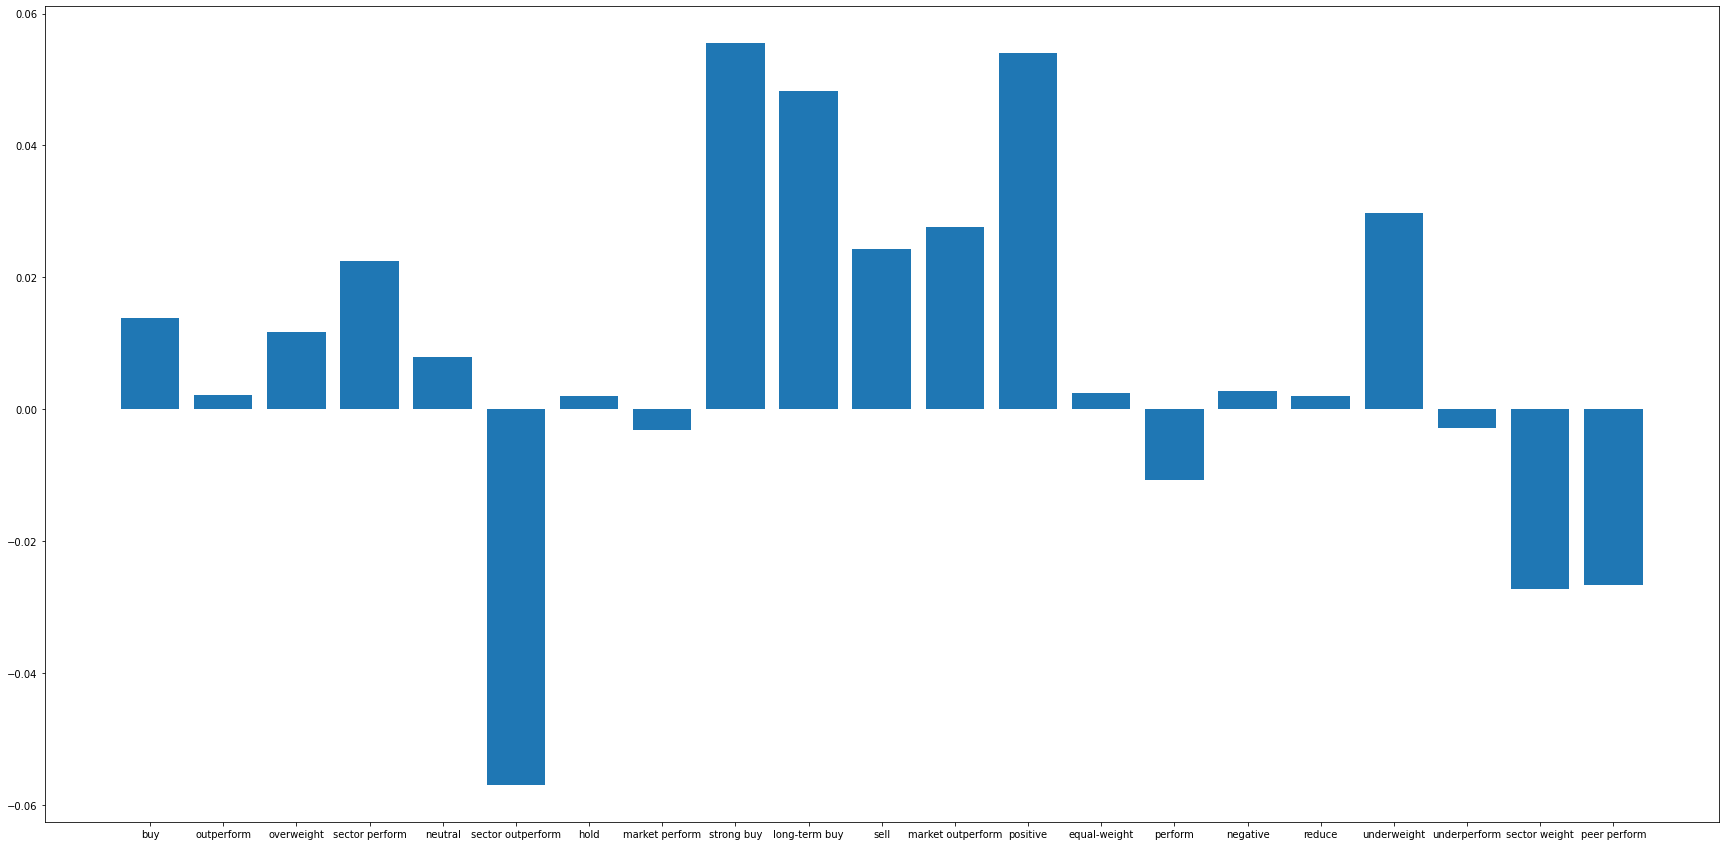

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize = (30,15))
plt.bar(returns_per_recommendation_type.index, returns_per_recommendation_type['Mean Return'])
#plt.tick_params(size = 25)


In [24]:


returns_per_recommendation_type['Mean Return'].sort_values()


sector outperform   -0.056941
sector weight       -0.027228
peer perform        -0.026642
perform             -0.010773
market perform      -0.003180
underperform        -0.002830
reduce               0.001960
hold                 0.002046
outperform           0.002109
equal-weight         0.002513
negative             0.002826
neutral              0.007980
overweight           0.011669
buy                  0.013781
sector perform       0.022547
sell                 0.024311
market outperform    0.027692
underweight          0.029719
long-term buy        0.048187
positive             0.054029
strong buy           0.055466
Name: Mean Return, dtype: float64

In [70]:



data.loc[data.Date == pd.to_datetime(f"{new_d.year}-{new_d.month}-{new_d.day}")].index



Int64Index([1594], dtype='int64')